# Practical Application III: Comparing Classifiers
**Denali Carpenter**
###### Please note, answers/responses are in **bold**.

---

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**As defined in the paper, each campaign is a contact of a client or a client calling the contact center. There were 52,944 campaigns based on this definition. However, it looks like the dataset provided might be an abbrieviated version of this dataset.**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

**Import the appropriate packages and modules**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import chi2_contingency
from scipy.stats import binom

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Name this 'portugese_banking_data' so that it is a bit more descriptive of the data.**

In [9]:
portuguese_banking_data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [10]:
portuguese_banking_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [12]:
portuguese_banking_data.shape

(41188, 21)

**Before data checks, we have 41,188 rows and 21 columns (1 response and 20 features).**

#### **Check for duplicates**

In [15]:
sum(portuguese_banking_data.duplicated())

12

In [16]:
duplicates = portuguese_banking_data[portuguese_banking_data.duplicated(keep = False)]
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


**Currently there are 12 duplicates, let's take a look at the data and think about the context to determine if these truly are duplicates that need to be removed.**

In [18]:
duplicates['duration']

1265     124
1266     124
12260     88
12261     88
14155    331
14234    331
16819     43
16956     43
18464    128
18465    128
20072     33
20216     33
20531    127
20534    127
25183    123
25217    123
28476    114
28477    114
32505    348
32516    348
36950    252
36951    252
38255    120
38281    120
Name: duration, dtype: int64

**I decided to take a look at the duration of each of these duplicates, since the likelihood of someone having the same age, job, etc., and talking on the phone for the exact same amount of time is very small. Since the durations are the same, I would say these are truly duplicates and can be removed before further analysis.**

In [20]:
# Drop duplicates and keep the first occurrence
portuguese_banking_data = portuguese_banking_data.drop_duplicates()

# Verify that duplicates are removed
print(sum(portuguese_banking_data.duplicated()))  # Should print 0

0


#### **Examine Data types and Null Counts**

**Let's take a look at the different column types and make sure they lineup** 

In [23]:
portuguese_banking_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

**It is weird to see employees as a float, so let's dig deeper.**

In [25]:
portuguese_banking_data['nr.employed']

0        5191.0
1        5191.0
2        5191.0
3        5191.0
4        5191.0
          ...  
41183    4963.6
41184    4963.6
41185    4963.6
41186    4963.6
41187    4963.6
Name: nr.employed, Length: 41176, dtype: float64

**Based on the paper provided this is a quarterly average. Since this is an average, we don't have to worry about this being a float. This was defined in the included link above. The remaining variables appear to be in the correct data typing, but will still need to be encoded after EDA for modeling.**

**Let's take a look at the number of missing values now.**

In [27]:
portuguese_banking_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**At first, it appears that there is no missing data. However, upon further inspection and looking at the data dictionary included, we can see that a number of the columns have missing values coded as 'unknown.' We can also see that the column 'pdays' has missing values coded as 999. Knowing this, let's recode the missing values and take a look at the percent missing in each column.**

In [29]:
# Select columns that have 'unknown' as a value
cols_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']
# Replace 'unknown' with NaN
portuguese_banking_data[cols_with_unknown] = portuguese_banking_data[cols_with_unknown].replace('unknown', np.nan)

In [30]:
portuguese_banking_data['pdays'] = portuguese_banking_data['pdays'].replace(999, np.nan)

In [31]:
portuguese_banking_data.isna().mean()

age               0.000000
job               0.008014
marital           0.001943
education         0.042015
default           0.208762
housing           0.024043
loan              0.024043
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.963207
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

**Here we can see that there are actually a number of columns that do have missing values. Most of these columns we will be able to impute, but 'pdays' has way too many missing values to be useful. Further, some of the information from this column is also contained in the 'previous' column. So, we will go ahead and drop this column since it will not be helpful toward our classification task.**

**We can also drop the 'duration' column, because it will not be known at the time of contact. Since we are trying to predict whether or not a client will 'subscribe a term deposit,' and this will have to occur before the phone call, we will not have the duration of the call at the time of needing to make the prediction. The removal of this variable was also mentioned within the paper provided.**

In [33]:
portuguese_banking_data.drop(columns=['pdays', 'duration'], inplace=True)

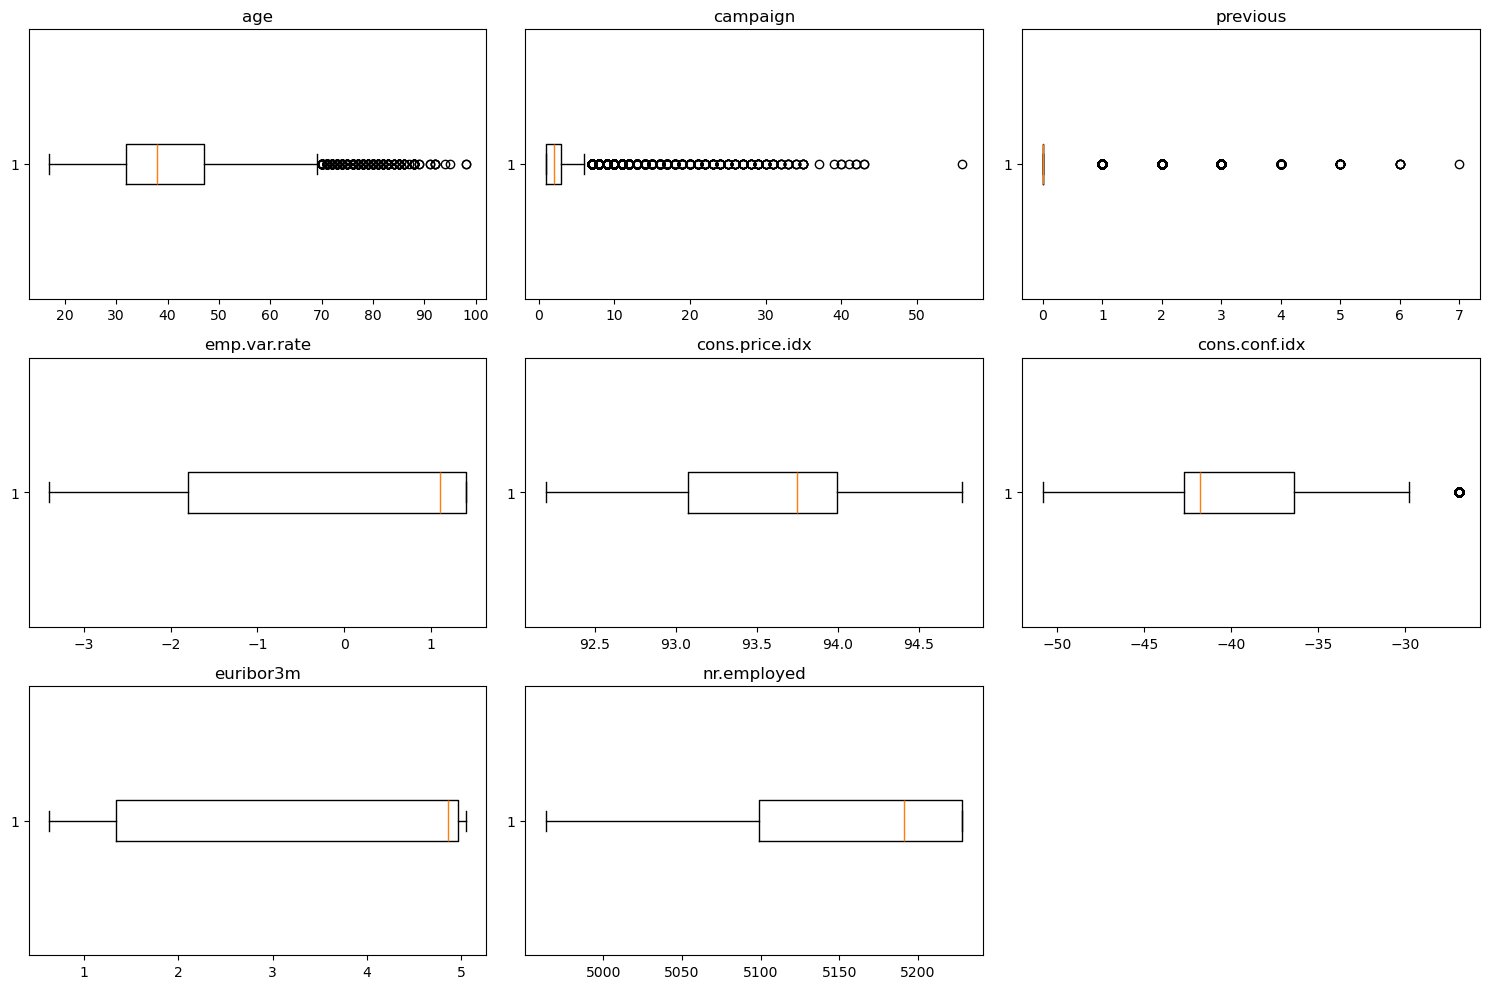

In [34]:
# Select numeric columns
numeric_columns = portuguese_banking_data.select_dtypes(include=['number']).columns

# Plot box plots for all numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Create subplots
    plt.boxplot(portuguese_banking_data[col].dropna(), vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()

In [35]:
def flag_iqr_outliers(df, column):
    """
    Flags rows where the values in the specified column are outliers 
    based on the IQR method.
    Returns the DataFrame with a new column indicating outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a new column to flag outliers
    outlier_flag_column = f"{column}_outlier"
    df[outlier_flag_column] = ~df[column].between(lower_bound, upper_bound)
    
    return df


# Flag outliers in 'age' and 'campaign'
portuguese_banking_data = flag_iqr_outliers(portuguese_banking_data, 'age')
portuguese_banking_data = flag_iqr_outliers(portuguese_banking_data, 'campaign')
portuguese_banking_data = flag_iqr_outliers(portuguese_banking_data, 'cons.conf.idx')

In [36]:
# View flagged outliers
portuguese_banking_data[['age_outlier', 'campaign_outlier', 'cons.conf.idx_outlier']].value_counts()

age_outlier  campaign_outlier  cons.conf.idx_outlier
False        False             False                    37924
             True              False                     2392
True         False             False                      400
False        False             True                       392
True         False             True                        54
             True              False                       14
Name: count, dtype: int64

In [37]:
# Drop rows where any outlier column is True
portuguese_banking_data = portuguese_banking_data[
    ~(portuguese_banking_data['age_outlier'] |
      portuguese_banking_data['campaign_outlier'] |
      portuguese_banking_data['cons.conf.idx_outlier'])
]

In [38]:
portuguese_banking_data.drop(columns=['age_outlier', 'campaign_outlier', 'cons.conf.idx_outlier'], inplace=True)

In [39]:
portuguese_banking_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37924 entries, 0 to 41186
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37924 non-null  int64  
 1   job             37632 non-null  object 
 2   marital         37856 non-null  object 
 3   education       36367 non-null  object 
 4   default         29983 non-null  object 
 5   housing         37014 non-null  object 
 6   loan            37014 non-null  object 
 7   contact         37924 non-null  object 
 8   month           37924 non-null  object 
 9   day_of_week     37924 non-null  object 
 10  campaign        37924 non-null  int64  
 11  previous        37924 non-null  int64  
 12  poutcome        37924 non-null  object 
 13  emp.var.rate    37924 non-null  float64
 14  cons.price.idx  37924 non-null  float64
 15  cons.conf.idx   37924 non-null  float64
 16  euribor3m       37924 non-null  float64
 17  nr.employed     37924 non-null  floa

**Before any feature engineering, we have 8 numeric columns (5 floats and 3 ints) and 11 object columns to work with. This also number includes the removal of `duration` and `pdays`.**

In [41]:
portuguese_banking_data.shape

(37924, 19)

**After removing the duplicates and outliers we are left with 37,924 rows and 19 columns (18 features and 1 response).**

#### **Exploratory Data Analysis**
##### _Examine univariate and multivariate analysis of variables_

---

###### **Univariate Analysis of Target Variable: `y`**

In [45]:
portuguese_banking_data[['y']].describe()

,y
count,37924
unique,2
top,no
freq,33773


In [46]:
portuguese_banking_data['y'].value_counts(normalize=True)

y
no     0.890544
yes    0.109456
Name: proportion, dtype: float64

**About 88.7% of our response variable is 'no' and the remaining 11.3% or so is 'yes.' This means that if we used a dummy classifier, we would be right 88.7% or the time or our accuracy would be 88.7%. This is tells us two things: 1. our non-dummary model should improve on this accuracy, and 2. accuracy maybe isn't the most informative due to the imbalance in `y`.**

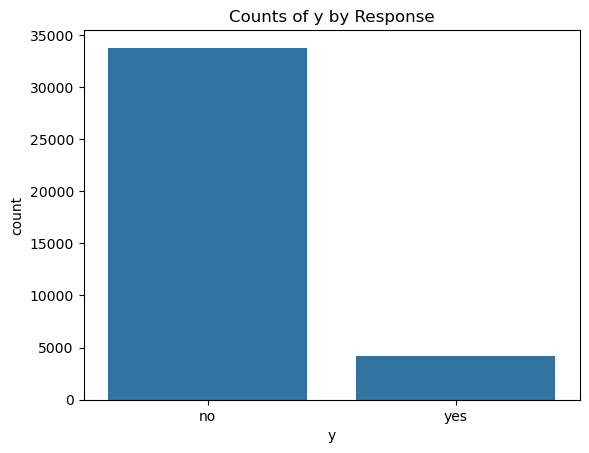

In [48]:
sns.countplot(x='y', data=portuguese_banking_data)
plt.title('Counts of y by Response')
plt.show()

**As we can see, the binary response variable is not evenly distributed. This could cause bias with certain models. I might explore this later by comapring SMOTE training data versus non-SMOTE training data.**

In [50]:
portuguese_banking_data['y'] = portuguese_banking_data['y'].replace({"no":'0', "yes":'1'})
portuguese_banking_data['y'] = portuguese_banking_data['y'].astype(int)

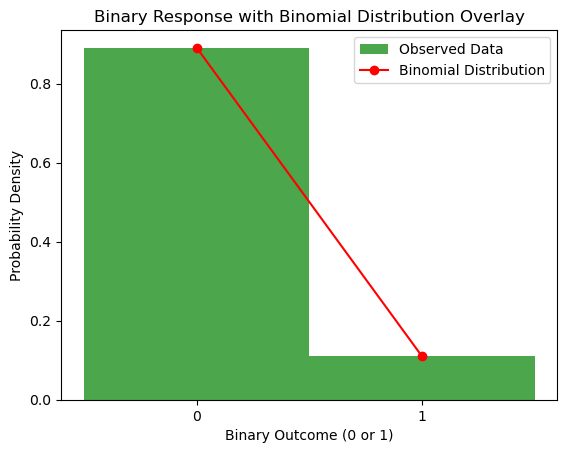

In [51]:
# Calculate the proportion of successes (p)
p_success = portuguese_banking_data['y'].mean()

# Define the binomial distribution
n_trials = 1  # Binary data implies one trial
x = np.array([0, 1])  # Possible outcomes: 0 and 1
binomial_probs = binom.pmf(x, n_trials, p_success)

# Plot histogram of binary response
plt.hist(portuguese_banking_data['y'], bins=2, density=True, alpha=0.7, color='green', label='Observed Data', range=(-0.5, 1.5))

# Overlay binomial distribution
plt.plot(x, binomial_probs, 'ro-', label='Binomial Distribution')

# Add labels and legend
plt.title('Binary Response with Binomial Distribution Overlay')
plt.xlabel('Binary Outcome (0 or 1)')
plt.ylabel('Probability Density')
plt.xticks([0, 1])
plt.legend()
plt.show()

**Our response variable `y` is a binary variable, and follows a Binomial Distribution** 

###### **Univariate Analysis of Feature Variables**

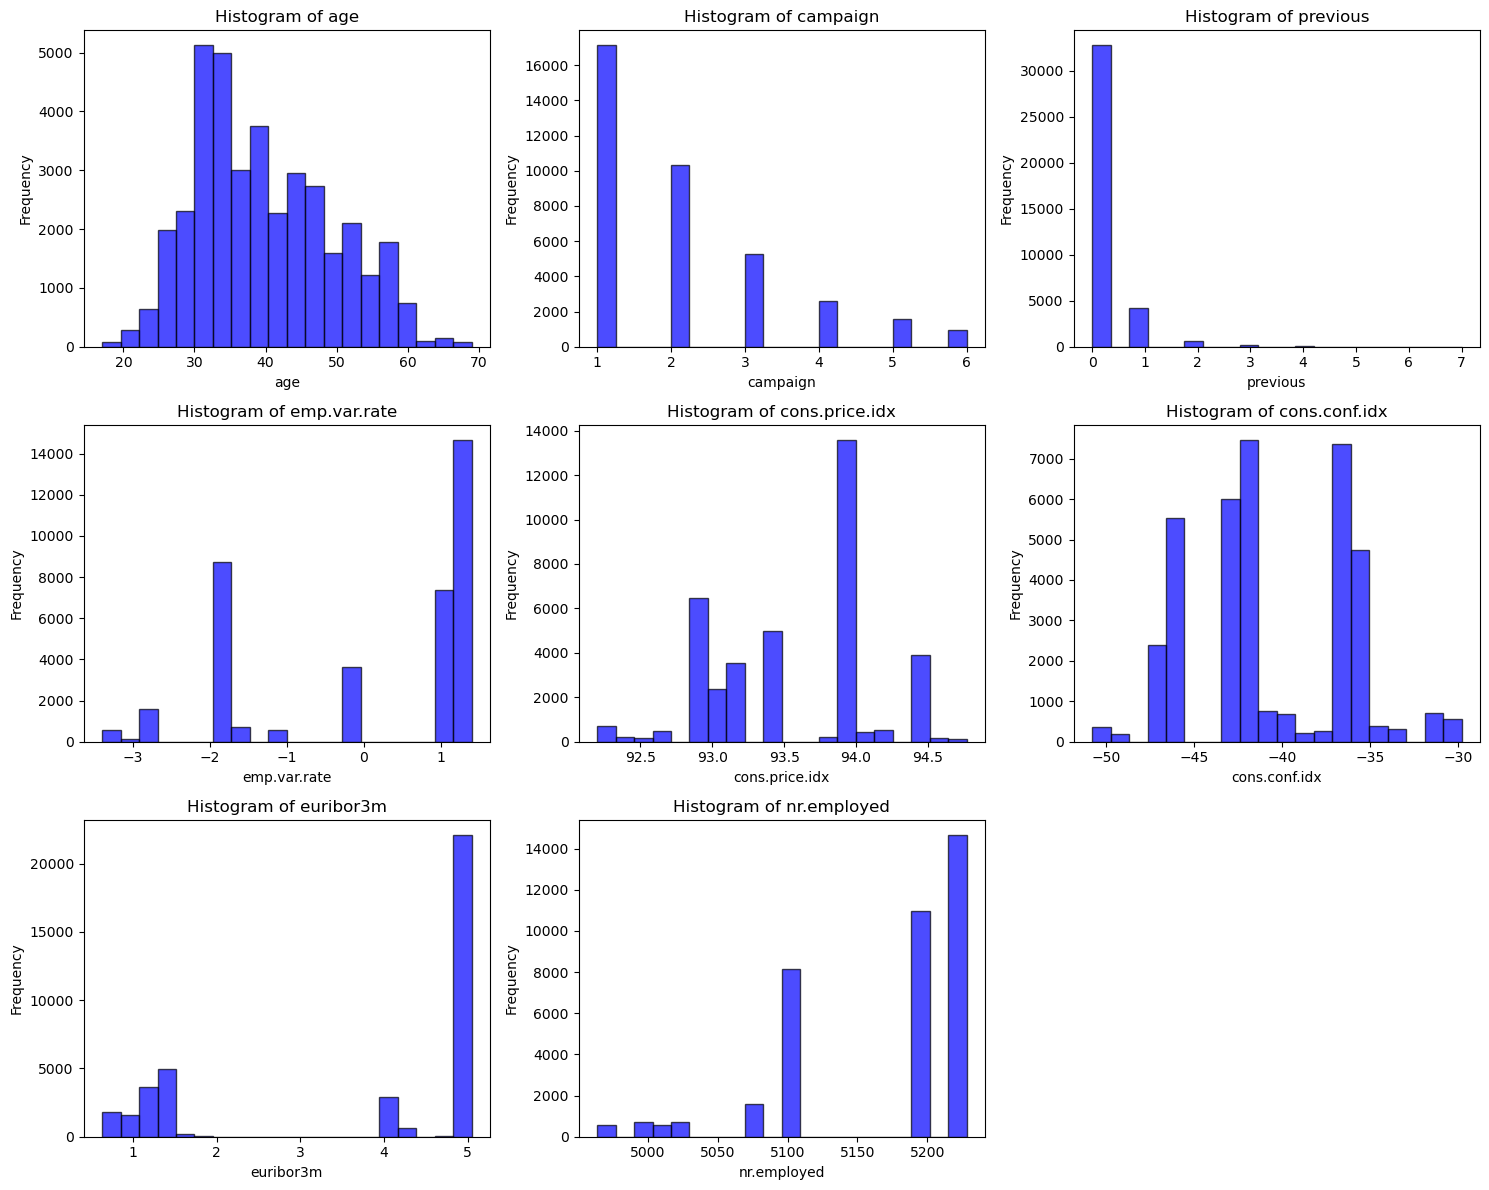

In [54]:
feature_columns = portuguese_banking_data.drop(columns=['y']).select_dtypes(include=['number'])

num_features = feature_columns.shape[1]
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, num_features * 1.5))
axes = axes.flatten()

for i, col in enumerate(feature_columns.columns):
    axes[i].hist(feature_columns[col].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

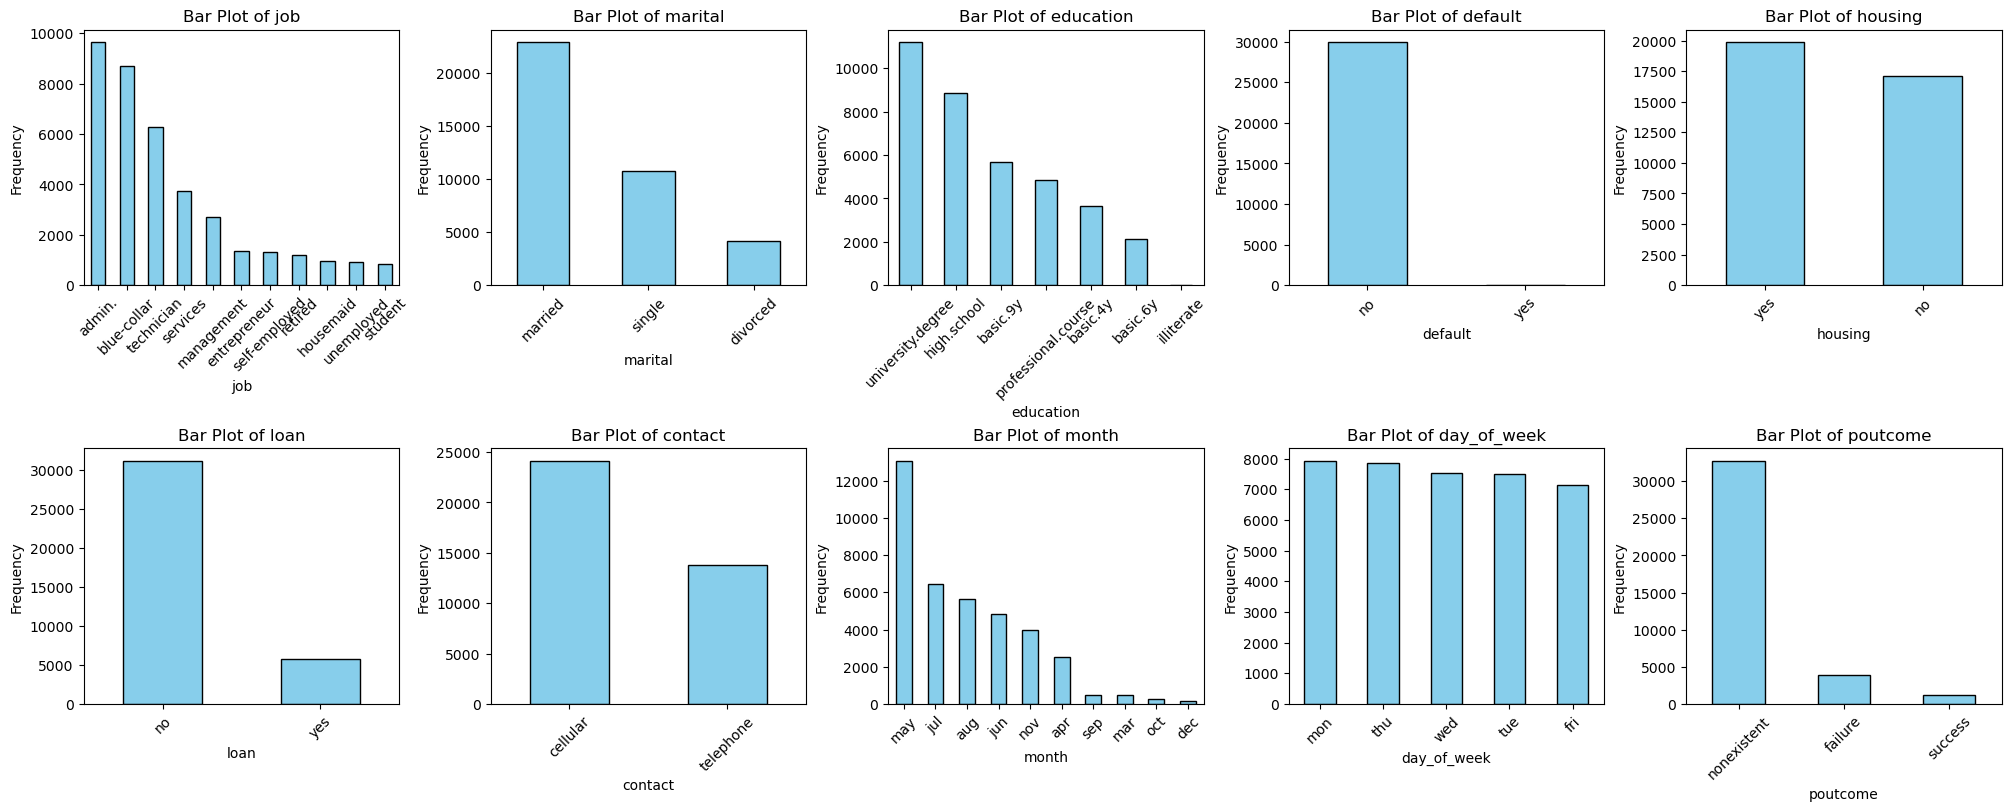

In [55]:
# Select the first 10 categorical features
categorical_features = portuguese_banking_data.select_dtypes(include=['object', 'category']).iloc[:, :10]

# Create a grid of 2 rows x 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), constrained_layout=True)
axes = axes.flatten()  # Flatten the grid for easier indexing

# Plot each categorical feature
for i, col in enumerate(categorical_features.columns):
    categorical_features[col].value_counts().plot(
        kind='bar', ax=axes[i], color='skyblue', edgecolor='black'
    )
    axes[i].set_title(f'Bar Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if less than 10 features are present)
for i in range(len(categorical_features.columns), len(axes)):
    fig.delaxes(axes[i])

# Display the grid
plt.show()

###### **Bivariate Analysis**

###### _**Numerical Value Relationships**_

In [58]:
corr = portuguese_banking_data.corr(numeric_only=True)

In [59]:
mask = np.triu(np.ones_like(portuguese_banking_data.corr(numeric_only = True).round(2)))

<Axes: >

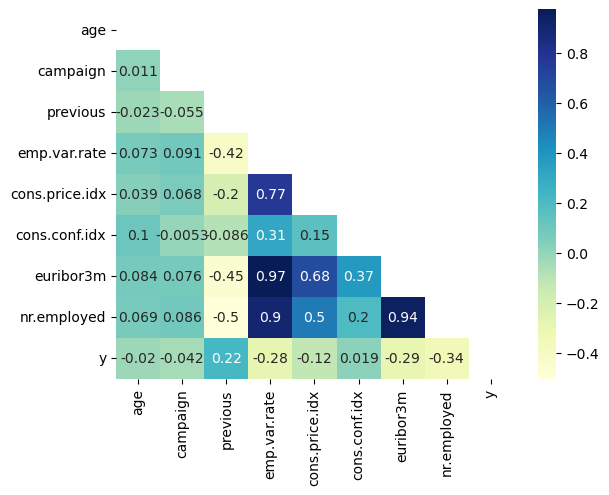

In [60]:
sns.heatmap(corr, annot = True, mask = mask, cmap = "YlGnBu")

**Positive correlation betwween `y` and `previous`, and a negative correlation between `y` and `emp.var.rate`, `cons.price.idx`, `euribor3m`, and `nr.employed`. `emp.var.rate` is defined as "employment variation rate - quarterly indicator (numeric)" in the data dictionary. `cons.price.idx` is defined in the data dictionary as "consumer price index - monthly indicator (numeric)." In the data dictionary we can also find `euribor3m` defined as "euribor 3 month rate - daily indicator (numeric)." Finally, `nr.employed` is defined as "number of employees - quarterly indicator (numeric)." The remaining variables show weak correlations with the response variable. For now, I think we will exclude them.**

**It should be noted that the correlations only indicate a linear relationship. It is entirely possible that there is a non-linear relationship between `y` and the other variables that show a low correlation.**

**It should also be noted that there is some strong correlation between somew of the features. For example, `emp.var.rate` is highly correlated with `nr.employed`, `euribor3m`, `cons.price.idx`. The aforementioned is not comprehensive, and tells me that maybe this dataset could benefit from PCA to reduce multicollinearity in the dataset. For the purpose of this assignment, I will not consider this due to time constraints. If given more time, this would be explored more.**

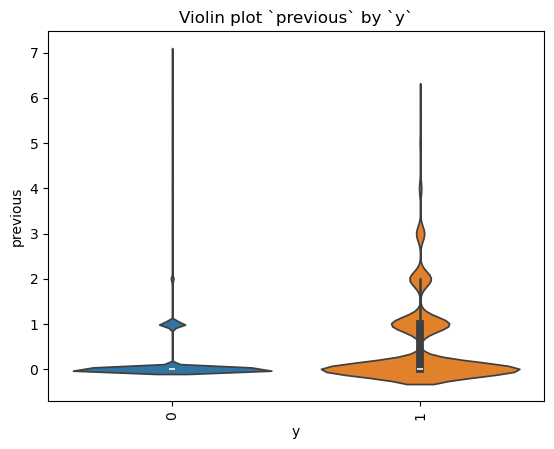

In [63]:
sns.violinplot(x = 'y', y = 'previous', data = portuguese_banking_data, hue = 'y')
# Rotate x-axis labels 45 degrees
plt.xticks(rotation=90)

# Hide the legend
plt.legend([], [], frameon=False)

plt.title("Violin plot `previous` by `y`")

# Display the plot
plt.show()

**Here we can see that our positive correlation is carried over to the violin plot. If drawing a line from one mean to the other we would see a positive slope.**

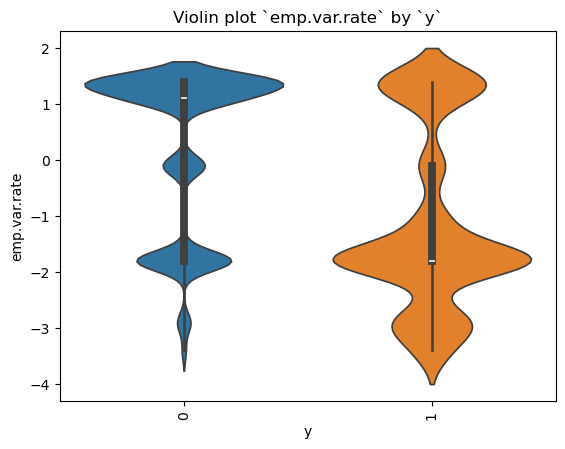

In [65]:
sns.violinplot(x = 'y', y = 'emp.var.rate', data = portuguese_banking_data, hue = 'y')
# Rotate x-axis labels 45 degrees
plt.xticks(rotation=90)

# Hide the legend
plt.legend([], [], frameon=False)

plt.title("Violin plot `emp.var.rate` by `y`")

# Display the plot
plt.show()

**Here we can see that our negative correlation is carried over to the violin plot. If drawing a line from one mean to the other we would see a negative slope.**

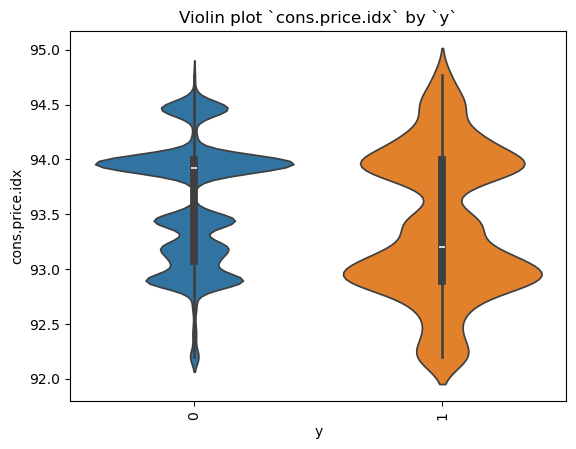

In [67]:
sns.violinplot(x = 'y', y = 'cons.price.idx', data = portuguese_banking_data, hue = 'y')
# Rotate x-axis labels 45 degrees
plt.xticks(rotation=90)

# Hide the legend
plt.legend([], [], frameon=False)

plt.title("Violin plot `cons.price.idx` by `y`")

# Display the plot
plt.show()

**Here we can see that our negative correlation is carried over to the violin plot. If drawing a line from one mean to the other we would see a negative slope.**

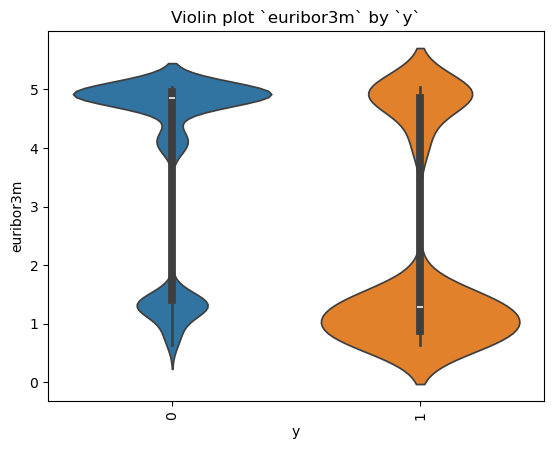

In [69]:
sns.violinplot(x = 'y', y = 'euribor3m', data = portuguese_banking_data, hue = 'y')
# Rotate x-axis labels 45 degrees
plt.xticks(rotation=90)

# Hide the legend
plt.legend([], [], frameon=False)

plt.title("Violin plot `euribor3m` by `y`")

# Display the plot
plt.show()

**Here we can see that our negative correlation is carried over to the violin plot. If drawing a line from one mean to the other we would see a negative slope.**

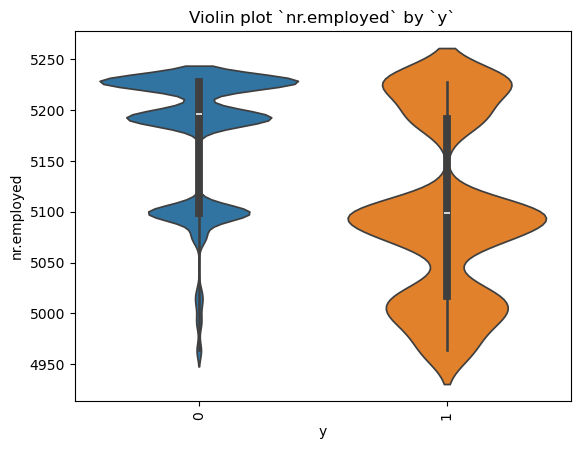

In [71]:
sns.violinplot(x = 'y', y = 'nr.employed', data = portuguese_banking_data, hue = 'y')
# Rotate x-axis labels 45 degrees
plt.xticks(rotation=90)

# Hide the legend
plt.legend([], [], frameon=False)

plt.title("Violin plot `nr.employed` by `y`")

# Display the plot
plt.show()

**Here we can see that our negative correlation is carried over to the violin plot. If drawing a line from one mean to the other we would see a negative slope.**

In [73]:
# Create contingency tables
job_contingency_table = pd.crosstab(portuguese_banking_data['job'], portuguese_banking_data['y'])
marital_contingency_table = pd.crosstab(portuguese_banking_data['marital'], portuguese_banking_data['y'])
education_contingency_table = pd.crosstab(portuguese_banking_data['education'], portuguese_banking_data['y'])
default_contingency_table = pd.crosstab(portuguese_banking_data['default'], portuguese_banking_data['y'])
housing_contingency_table = pd.crosstab(portuguese_banking_data['housing'], portuguese_banking_data['y'])
loan_contingency_table = pd.crosstab(portuguese_banking_data['loan'], portuguese_banking_data['y'])
contact_contingency_table = pd.crosstab(portuguese_banking_data['contact'], portuguese_banking_data['y'])
month_contingency_table = pd.crosstab(portuguese_banking_data['month'], portuguese_banking_data['y'])
day_of_week_contingency_table = pd.crosstab(portuguese_banking_data['day_of_week'], portuguese_banking_data['y'])

# Perform Chi-Square Test
chi2_job, p_job, dof_job, expected_job = chi2_contingency(job_contingency_table)
chi2_marital, p_marital, dof_marital, expected_marital = chi2_contingency(marital_contingency_table)
chi2_education, p_education, dof_education, expected_education = chi2_contingency(education_contingency_table)
chi2_default, p_default, dof_default, expected_defaul = chi2_contingency(default_contingency_table)
chi2_housing, p_housing, dof_housing, expected_housing = chi2_contingency(housing_contingency_table)
chi2_loan, p_loan, dof_loan, expected_loan = chi2_contingency(loan_contingency_table)
chi2_contact, p_contact, dof_contact, expected_contact = chi2_contingency(contact_contingency_table)
chi2_month, p_month, dof_month, expected_month = chi2_contingency(month_contingency_table)
chi2_day_of_week, p_day_of_week, dof_day_of_week, expected_day_of_week = chi2_contingency(day_of_week_contingency_table)

print(f"job Chi-Square Statistic: {chi2_job}, p-value: {p_job}")
print(f"marital Chi-Square Statistic: {chi2_marital}, p-value: {p_marital}")
print(f"education Chi-Square Statistic: {chi2_education}, p-value: {p_education}")
print(f"default Chi-Square Statistic: {chi2_default}, p-value: {p_default}")
print(f"housing Chi-Square Statistic: {chi2_housing}, p-value: {p_housing}")
print(f"loan Chi-Square Statistic: {chi2_loan}, p-value: {p_loan}")
print(f"contact Chi-Square Statistic: {chi2_contact}, p-value: {p_contact}")
print(f"month Chi-Square Statistic: {chi2_month}, p-value: {p_month}")
print(f"day_of_week Chi-Square Statistic: {chi2_day_of_week}, p-value: {p_day_of_week}")

job Chi-Square Statistic: 646.5770341327667, p-value: 1.8244034990597306e-132
marital Chi-Square Statistic: 158.74965886582282, p-value: 3.372481494402735e-35
education Chi-Square Statistic: 200.988708767655, p-value: 1.168832722631071e-40
default Chi-Square Statistic: 0.0, p-value: 1.0
housing Chi-Square Statistic: 5.1921355490506915, p-value: 0.022689318762111117
loan Chi-Square Statistic: 0.3181914880923436, p-value: 0.5726965266948771
contact Chi-Square Statistic: 743.3431404695532, p-value: 1.1242193761759298e-163
month Chi-Square Statistic: 2592.368260308471, p-value: 0.0
day_of_week Chi-Square Statistic: 23.828169718012965, p-value: 8.646539397423764e-05


In [74]:
portuguese_banking_data['default'].value_counts()

default
no     29980
yes        3
Name: count, dtype: int64

Looks like there is some difference between within-groups in the `job`, `marital`, `education`, `housing`, `contact`, `month`, and `day_of_week` for those 'who subscribe a deposit.' There does not appear to be a relationship between `y` and `default` and `loan`.

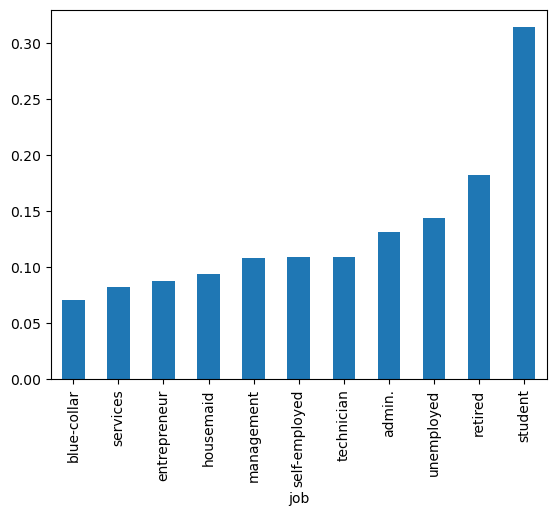

In [76]:
portuguese_banking_data.groupby('job')['y'].mean().round(3).sort_values().plot(kind = 'bar');

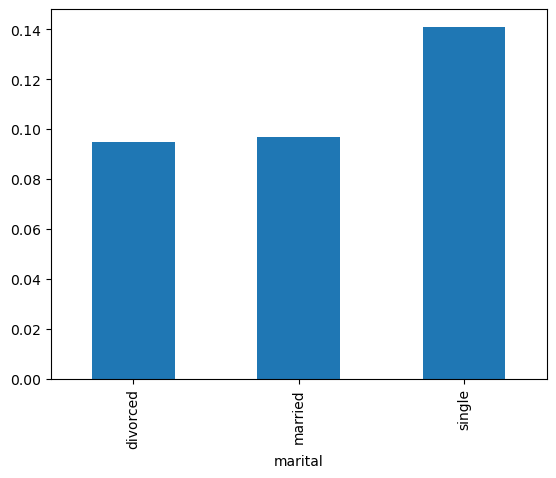

In [77]:
portuguese_banking_data.groupby('marital')['y'].mean().round(3).sort_values().plot(kind = 'bar');

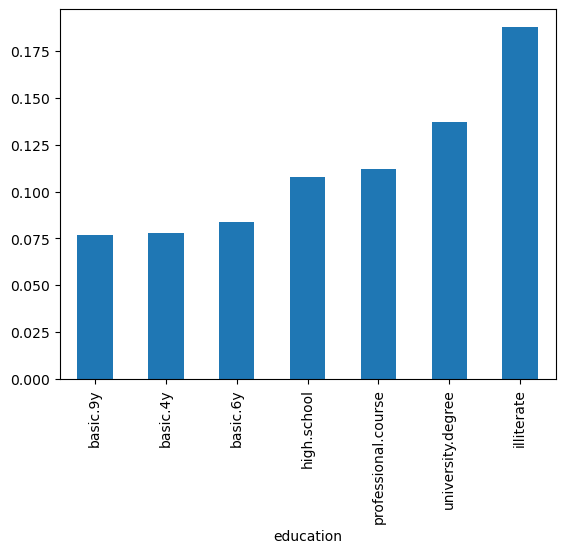

In [78]:
portuguese_banking_data.groupby('education')['y'].mean().round(3).sort_values().plot(kind = 'bar');

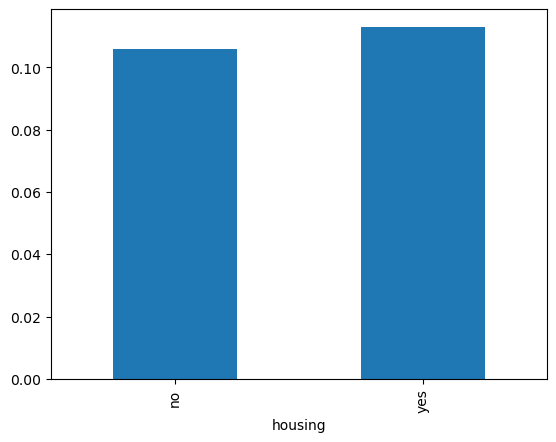

In [79]:
portuguese_banking_data.groupby('housing')['y'].mean().round(3).sort_values().plot(kind = 'bar');

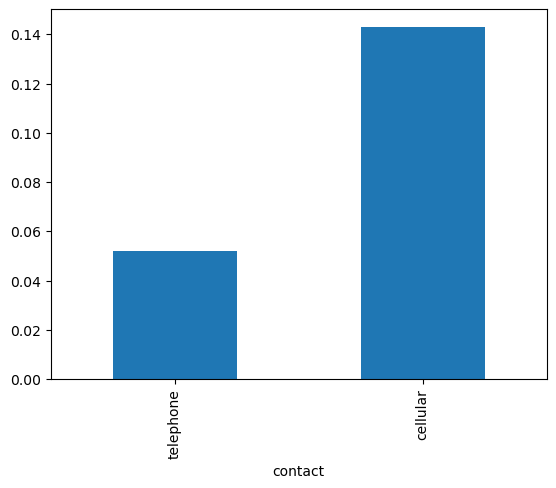

In [80]:
portuguese_banking_data.groupby('contact')['y'].mean().round(3).sort_values().plot(kind = 'bar');

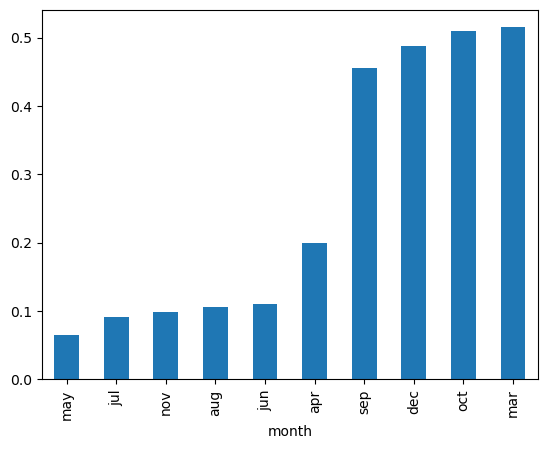

In [81]:
portuguese_banking_data.groupby('month')['y'].mean().round(3).sort_values().plot(kind = 'bar');

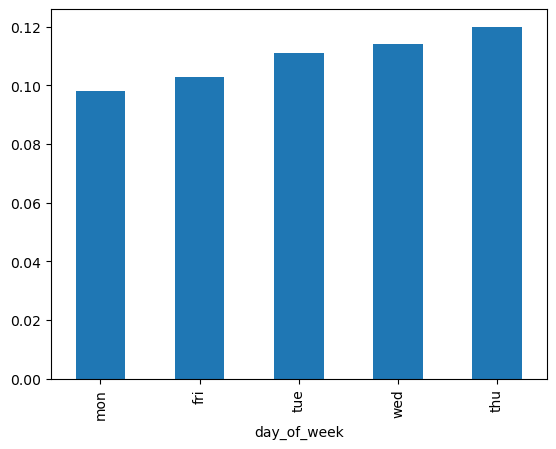

In [82]:
portuguese_banking_data.groupby('day_of_week')['y'].mean().round(3).sort_values().plot(kind = 'bar');

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**The Business Objective here is to support and strengthen the efficacy of our bank's telemarketing campaigns. The goal is to accuractely predict whether a customer will subscribe to a term deposit before an initial call (incoming or outgoing). If this goal is achieved the bank can reduce overall operating cost by increasing revenue and reducing the cost for identifying customers who will subscribe in telemarketing campaigns.**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [86]:
portuguese_banking_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37924 entries, 0 to 41186
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37924 non-null  int64  
 1   job             37632 non-null  object 
 2   marital         37856 non-null  object 
 3   education       36367 non-null  object 
 4   default         29983 non-null  object 
 5   housing         37014 non-null  object 
 6   loan            37014 non-null  object 
 7   contact         37924 non-null  object 
 8   month           37924 non-null  object 
 9   day_of_week     37924 non-null  object 
 10  campaign        37924 non-null  int64  
 11  previous        37924 non-null  int64  
 12  poutcome        37924 non-null  object 
 13  emp.var.rate    37924 non-null  float64
 14  cons.price.idx  37924 non-null  float64
 15  cons.conf.idx   37924 non-null  float64
 16  euribor3m       37924 non-null  float64
 17  nr.employed     37924 non-null  floa

In [87]:
portuguese_banking_data['month'].value_counts()

month
may    13076
jul     6457
aug     5640
jun     4824
nov     3992
apr     2530
sep      507
mar      487
oct      255
dec      156
Name: count, dtype: int64

In [88]:
portuguese_banking_data['day_of_week'].value_counts()

day_of_week
mon    7931
thu    7857
wed    7524
tue    7485
fri    7127
Name: count, dtype: int64

**Since `month` is missing two months I am going to treat it as an object and one-hot encode it**

In [90]:
# Define columns for encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
ordinal_features = ['day_of_week']

# Ordinal categories for OrdinalEncoder
ordinal_mapping_days = [['mon', 'tue', 'wed', 'thu', 'fri']]

# Preprocessor for categorical and ordinal data (no scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ordinal_days', OrdinalEncoder(categories=ordinal_mapping_days), ['day_of_week'])
    ]
)

**Here, I set up a ColumnTransformer that I will later place in a pipeline.**

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [93]:
# Separate features and target
X = portuguese_banking_data.drop('y', axis=1)
y = portuguese_banking_data['y']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
#Impute missing values
print(X_train.isna().sum())
print(X_test.isna().sum())

age                  0
job                227
marital             51
education         1272
default           6361
housing            721
loan               721
contact              0
month                0
day_of_week          0
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64
age                  0
job                 65
marital             17
education          285
default           1580
housing            189
loan               189
contact              0
month                0
day_of_week          0
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64


In [95]:
from sklearn.impute import SimpleImputer

In [96]:
# initiate median imputer for numeric columns
num_imputer = SimpleImputer(strategy = "median")

# intitiate most frequent imputer for categorical columns
cat_imputer = SimpleImputer(strategy= "most_frequent")

In [97]:
X_train.isna().mean()

age               0.000000
job               0.007482
marital           0.001681
education         0.041926
default           0.209664
housing           0.023765
loan              0.023765
contact           0.000000
month             0.000000
day_of_week       0.000000
campaign          0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
dtype: float64

In [98]:
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns
print(numeric_cols, categorical_cols)

#fit_transform on train, transform on val and test

#train
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])

#test
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object') Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [99]:
X_train.isna().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
dtype: float64

In [100]:
X_test.isna().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
dtype: float64

In [101]:
# Scale numeric features separately
scaler = StandardScaler()

# Fit-transform scaler on training data and transform test data
X_train_numeric = scaler.fit_transform(X_train[numeric_cols])
X_test_numeric = scaler.transform(X_test[numeric_cols])

# Replace numeric columns with scaled values in train and test sets
X_train[numeric_cols] = X_train_numeric
X_test[numeric_cols] = X_test_numeric

In [102]:
X_train[numeric_cols].head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27870,-0.372158,0.739198,-0.348254,-1.242794,-1.300040,-2.104738,-1.201478,-0.985162
423,-0.061322,0.739198,-0.348254,0.649706,0.730182,0.967909,0.708527,0.322047
31775,0.560349,-0.819769,-0.348254,-1.242794,-1.211846,-1.246204,-1.351454,-0.985162
14219,-0.993829,0.739198,-0.348254,0.845482,0.596127,-0.455449,0.769801,0.849767
27551,1.285632,-0.040286,-0.348254,-0.133397,-0.670336,-0.297298,0.220668,0.390323


In [103]:
X_train[categorical_cols].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
27870,admin.,married,high.school,no,yes,no,cellular,mar,thu,nonexistent
423,management,married,university.degree,no,no,no,telephone,may,tue,nonexistent
31775,admin.,divorced,basic.9y,no,yes,no,cellular,may,thu,nonexistent
14219,blue-collar,married,basic.9y,no,yes,no,cellular,jul,mon,nonexistent
27551,blue-collar,married,basic.9y,no,no,no,cellular,nov,fri,nonexistent


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [105]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

In [106]:
#fit the model
dummy.fit(X_train, y_train)

DummyClassifier()

In [107]:
y_dummy_pred = dummy.predict(X_test)

print(confusion_matrix(y_test, y_dummy_pred))

print(classification_report(y_test, y_dummy_pred, zero_division=0))

[[6731    0]
 [ 854    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6731
           1       0.00      0.00      0.00       854

    accuracy                           0.89      7585
   macro avg       0.44      0.50      0.47      7585
weighted avg       0.79      0.89      0.83      7585



In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision score
precision = precision_score(y_test, y_dummy_pred, zero_division=0)
print(f"Precision: {precision:.2f}")

# Recall score
recall = recall_score(y_test, y_dummy_pred, zero_division=0)
print(f"Recall: {recall:.2f}")

# F1 score
f1 = f1_score(y_test, y_dummy_pred, zero_division=0)
print(f"F1 Score: {f1:.2f}")

Precision: 0.00
Recall: 0.00
F1 Score: 0.00


**There are 6,731 true negatives, 0 false positives, 854 false negatives, and 0 true positives. The model has a precision of 0 and a recall of 0 because we identified none of the positive cases (1). Thus, our F1 score is 0. However, there is an overall accruacy of 89% just from selecting the majority class.**

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [111]:
# Create pipelines for each model
pipelines = {
    'SVM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True, random_state=42))
    ]),
    'KNN': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    'LogisticRegression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'DecisionTree': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])
}

simple_logistic_regression = pipelines['LogisticRegression'].fit(X_train, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [113]:
y_simply_log_pred = simple_logistic_regression.predict(X_test)
print(classification_report(y_test, y_simply_log_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6731
           1       0.64      0.15      0.25       854

    accuracy                           0.90      7585
   macro avg       0.77      0.57      0.60      7585
weighted avg       0.87      0.90      0.87      7585



**90% accuracy for this model.**

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

**Due to the imbalanced nature of the response variable. I chose to focus on the F1 score, as it show the best balance between precision and recall which is what we are hoping for here to increase our chances in identifying subscribers.**

In [116]:
import time

models = []
train_time = []
train_accuracy = []
test_accuracy = []
f1_test = []
precision_test = []
recall_test = []


# Fit and evaluate each pipeline
for model_name, pipeline in pipelines.items():

    models.append(model_name)
    
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    end_time = time.time()
    train_time.append(end_time - start_time)
    
    test_score = pipeline.score(X_test, y_test)
    train_score = pipeline.score(X_train, y_train)

    test_accuracy.append(test_score)
    train_accuracy.append(train_score)
    
    # Precision score
    precision = precision_score(y_test, pipeline.predict(X_test), zero_division=0)

    precision_test.append(precision)

    # Recall score
    recall = recall_score(y_test, pipeline.predict(X_test), zero_division=0)

    recall_test.append(recall)

    # F1 score
    f1 = f1_score(y_test, pipeline.predict(X_test), zero_division=0)

    f1_test.append(f1)
    
    
    print(f"{model_name} Test Accuracy: {test_score:.2f}")

SVM Test Accuracy: 0.90
KNN Test Accuracy: 0.89
LogisticRegression Test Accuracy: 0.90
DecisionTree Test Accuracy: 0.87


In [117]:
# Create a dictionary to organize your lists into columns
simple_results = {
    'Model': models,
    'Train Time (s)': train_time,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision_test,
    'Recall': recall_test,
    'F1 Score': f1_test
}

# Create a pandas DataFrame
simple_results_data = pd.DataFrame(simple_results)

# Display the DataFrame
simple_results_data

,Model,Train Time (s),Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,SVM,141.234665,0.900524,0.897165,0.651639,0.186183,0.289617
1,KNN,0.027003,0.906490,0.887278,0.497585,0.120609,0.194156
2,LogisticRegression,0.048502,0.899403,0.895056,0.642157,0.153396,0.247637
3,DecisionTree,0.196397,0.944230,0.870929,0.373225,0.215457,0.273200


**Here we can see the model with the best training accuracy is the Decision Tree. Based on what we learned, this makes sense, because decision trees tend to 'memorize' the training information, which can lead to overfitting. We do seem to be overfitting in this case, since the test accuracy is the lowest for the decision tree algorithm. There is a large improvement in precision, recall and f1 score when compared to the dummy classifier. This makes a lot of sense, because our dummy classifier predicted 0 for every case in the test set. The model with the highest precision was the SVM model. The model with the highest recall was the decision tree. And finally, the model with the highest F1 score was the SVM. However, this model take much longer to train. So, if time is a constraint the decision tree model appears to be the best choice. Given this, I think random forest would preform very well.**

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [120]:
# Define parameter grids for each model
param_grids = {
    'SVM': {
        'classifier__C': [0.1, 1, 10],                # Regularization parameter
        'classifier__kernel': ['linear', 'rbf'],     # Kernel types
        'classifier__gamma': ['scale', 'auto']       # Kernel coefficient
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],        # Number of neighbors
        'classifier__weights': ['uniform', 'distance']  # Weight function
    },
    'LogisticRegression': {
        'classifier__C': [0.01, 0.1, 1, 10],         # Inverse of regularization strength
        'classifier__solver': ['liblinear', 'lbfgs'] # Solver types
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 5, 10],      # Max depth of the tree
        'classifier__min_samples_split': [2, 5, 10]  # Min samples to split
    }
}

In [121]:
# Initialize a dictionary to store tuned pipelines
tuned_pipelines = {}

for model_name, pipeline in pipelines.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    # Get the parameter grid for the model
    param_grid = param_grids[model_name]
    
    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        estimator=pipeline,        # Pipeline for the model
        param_grid=param_grid,     # Parameter grid
        scoring='f1',              # Scoring metric
        cv=5,                      # 5-fold cross-validation
        n_jobs=-1,                 # Use all available CPUs
        verbose=1                  # Print progress
    )
    
    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Save the best pipeline
    tuned_pipelines[model_name] = grid_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated score for {model_name}: {grid_search.best_score_:.2f}")

Tuning hyperparameters for SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validated score for SVM: 0.30
Tuning hyperparameters for KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Best cross-validated score for KNN: 0.25
Tuning hyperparameters for LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for LogisticRegression: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Best cross-validated score for LogisticRegression: 0.27
Tuning hyperparameters for DecisionTree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for DecisionTree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best cross-validated score for DecisionTree: 0.31


In [209]:
# Evaluate each tuned pipeline
for model_name, pipeline in tuned_pipelines.items():
    print(f"\nEvaluating {model_name} on the test set")
    f1 = f1_score(y_test, pipeline.predict(X_test), zero_division=0)
    test_score = pipeline.score(X_test, y_test)
     # Precision score
    precision = precision_score(y_test, pipeline.predict(X_test), zero_division=0)
    # Recall score
    recall = recall_score(y_test, pipeline.predict(X_test), zero_division=0)


    print(f"\nAccuracy Score of {test_score} on the test set...")
    print(f"\nF1 Score of {f1} on the test set...")
    print(f"\nRecall of {recall} on the test set...")
    print(f"\nPrecision of {precision} on the test set...")


Evaluating SVM on the test set

Accuracy Score of 0.8953197099538563 on the test set...

F1 Score of 0.2820976491862568 on the test set...

Recall of 0.18266978922716628 on the test set...

Precision of 0.6190476190476191 on the test set...

Evaluating KNN on the test set

Accuracy Score of 0.8779169413315755 on the test set...

F1 Score of 0.23089700996677742 on the test set...

Recall of 0.16276346604215455 on the test set...

Precision of 0.39714285714285713 on the test set...

Evaluating LogisticRegression on the test set

Accuracy Score of 0.8950560316413975 on the test set...

F1 Score of 0.24763705103969755 on the test set...

Recall of 0.15339578454332553 on the test set...

Precision of 0.6421568627450981 on the test set...

Evaluating DecisionTree on the test set

Accuracy Score of 0.8926829268292683 on the test set...

F1 Score of 0.2934027777777778 on the test set...

Recall of 0.19789227166276346 on the test set...

Precision of 0.5671140939597316 on the test set...


**If I had more time, I would try only including the variables that I found to have some correlation with the response variable `y` or showed significance in the Chi-Squared test. I think this could be a good way of selecting the most important features.**

**Overall, it looks like the decision tree performed the best after hyper-parameter tuning. In looking at the F1 score, we see a higher score on the test set for this mdoel than any other model. Interestingly, because we chose to focus on the F1 metric it appears our accuracy scores are all relatively the same, with KNN actually having a worse accuracy than the dummy model (it should be noted the other metrics indicate better overall performance).**

**In conclusion I would recommend using a decision tree classifier to identify new subscribers, and would also recommend exploring random forest as an option.**

##### Questions